<a href="https://colab.research.google.com/github/bryanMontoya/machineLearning/blob/main/Analisis_de_componentes_Principales_2.0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis de componentes principales PCA.**
Método aplicado para la reducción de la dimensionalidad.
- No mantiene la interpretabilidad de los modelos.
- Disminuir la carga computacional como objetivo.
- Mantener máxima variabilidad de los datos.
- Distribuir la información por capas.
- Antes de aplicar el método se debe hacer escalamiento.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, roc_curve, roc_auc_score
from sklearn.decomposition import PCA

plt.rc('font', size = 16)

In [3]:
col_names = ['pregnant', 'glucose', 'bp','skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
path = 'drive/MyDrive/ML-Models/data1/diabetes.csv'
path = 'drive/MyDrive/diabetes.csv'
pima = pd.read_csv(path)
pima = pima.set_axis(col_names, axis = 1)
pima.head(10)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
X = pima.drop('label', axis = 1)
y = pima.label
print(X.shape)

(768, 8)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4)                                                  
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
clf = SVC(kernel = 'rbf', probability = True)
parameters = {'C' : np.logspace(-4,4,9), 'gamma' : np.logspace(-4,4,9)}
#gamma: realacionado con las desviaciones estandares.

In [7]:
#Validación cruzada para c y gamma...
SVM_model = GridSearchCV(clf, param_grid = parameters, cv = 5)
SVM_model.fit(X_train, y_train)
print('Mejores parámetros: ', SVM_model.best_params_)

Mejores parámetros:  {'C': 10.0, 'gamma': 0.01}


In [8]:
SVM_model = SVC (kernel = 'rbf', probability = True, C = SVM_model.best_params_['C'], gamma = SVM_model.best_params_['gamma'])
SVM_model.fit(X_train, y_train)
y_pred = SVM_model.predict(X_test)

In [9]:
print('Accuracy en entrenamiento: {:.2f}'.format(SVM_model.score(X_train, y_train)))
print('Accuracy en test: {:.2f}'.format(SVM_model.score(X_test, y_test)))

Accuracy en entrenamiento: 0.80
Accuracy en test: 0.79


In [10]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[109  17]
 [ 23  43]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.84       126
           1       0.72      0.65      0.68        66

    accuracy                           0.79       192
   macro avg       0.77      0.76      0.76       192
weighted avg       0.79      0.79      0.79       192



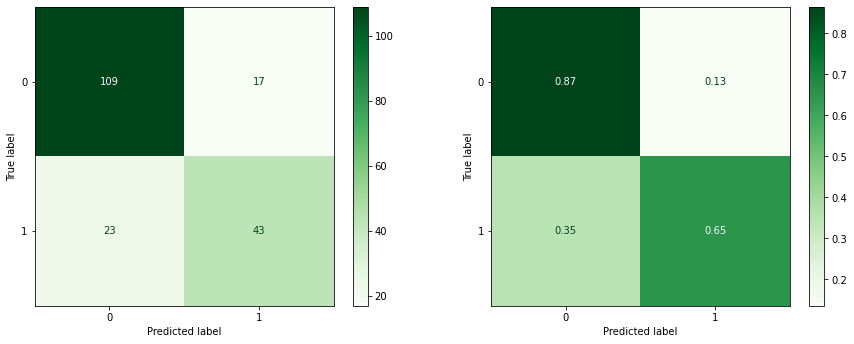

In [11]:
%matplotlib inline
plt.figure(figsize = (15,5.5))
fig = plt.subplot(1,2,1)
plot_confusion_matrix(SVM_model, X_test, y_test, values_format = '.0f', cmap = 'Greens', ax = fig);
fig = plt.subplot(1,2,2)
plot_confusion_matrix(SVM_model, X_test, y_test, normalize = 'true', cmap = 'Greens', ax = fig);

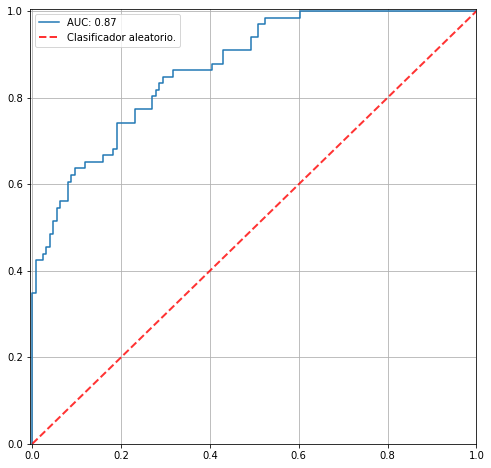

In [12]:
plt.figure(figsize = (8,8))
y_pre_proba = SVM_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pre_proba)
auc = roc_auc_score(y_test, y_pre_proba)
plt.plot(fpr,tpr, label = 'AUC: {:.2f}'.format(auc));
plt.plot([0,1],[0,1], linestyle = '--', lw = 2, color = 'r', alpha = 0.8, label = 'Clasificador aleatorio.');
plt.grid();
plt.legend();
plt.xlim([-0.005,1]);
plt.ylim([0,1.005]);

In [15]:
X = pima.drop('label', axis = 1)
X = X.values
y = pima.label
h = 0.02
clf = SVC(kernel = 'rbf', probability = True, C = 10, gamma = 0.01 )
clf.fit(X[:,[5,6]], y)
x_min, x_max = X[:,5].min() - 0.5, X[:,5].max() + 0.5
y_min, y_max = X[:,6].min() - 0.5, X[:,6].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
zz = Z.reshape(xx.shape)

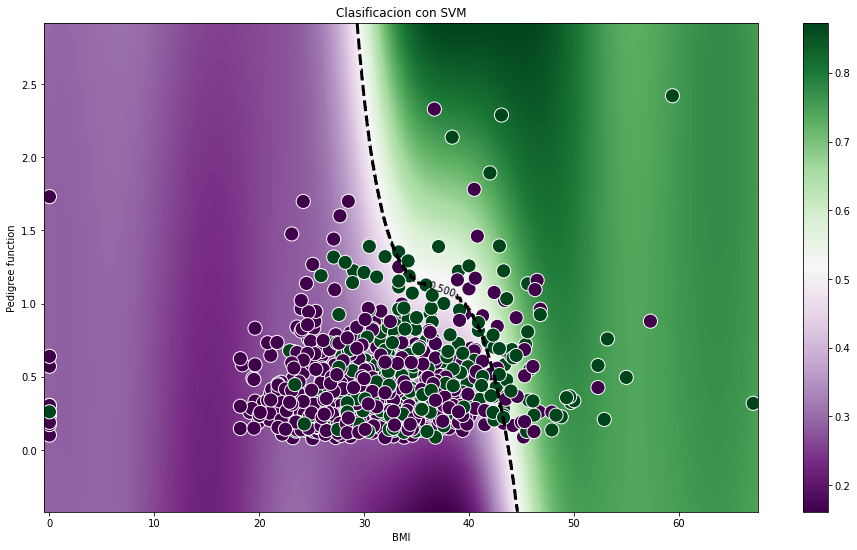

In [18]:
plt.figure(figsize = (16,9))
plt.pcolormesh(xx, yy, zz, cmap = 'PRGn')
plt.colorbar()
contours = plt.contour(xx, yy, zz, colors = 'k', levels = [0.5], linewidths = 3, linestyles = 'dashed')
plt.clabel(contours, inline = True, fontsize = 10)

plt.scatter(X[:,5], X[:,6], c = y, cmap = 'PRGn', edgecolors = 'w', s = 200)
plt.xlim([x_min, x_max]);
plt.ylim([y_min, y_max]);
plt.title('Clasificacion con SVM');
plt.xlabel('BMI');
plt.ylabel('Pedigree function');

In [19]:
pca = PCA()
X_trainpca = pca.fit_transform(X_train)
X_testpca = pca.transform(X_test)
print(pca.explained_variance_ratio_)
print(X_trainpca.shape)

[0.26247114 0.21697409 0.12806197 0.11497751 0.09345808 0.08212497
 0.05226723 0.04966501]
(576, 8)


In [20]:
pca = PCA(n_components = 7)
X_trainpca = pca.fit_transform(X_trainpca)
X_testpca = pca.transform(X_testpca)
print(pca.explained_variance_ratio_)
print(X_trainpca.shape)

[0.26247114 0.21697409 0.12806197 0.11497751 0.09345808 0.08212497
 0.05226723]
(576, 7)


In [21]:
clf = SVC(kernel = 'rbf', probability = True)
parameters = {'C' : np.logspace(-4,4,9), 'gamma' : np.logspace(-4,4,9)}
SVM_model = GridSearchCV(clf, param_grid = parameters, cv = 5)
SVM_model.fit(X_trainpca, y_train)
print('Mejores parámetros: ', SVM_model.best_params_)

SVM_model = SVC (kernel = 'rbf', probability = True, C = SVM_model.best_params_['C'], gamma = SVM_model.best_params_['gamma'])
SVM_model.fit(X_trainpca, y_train)
y_pred = SVM_model.predict(X_testpca)

Mejores parámetros:  {'C': 10.0, 'gamma': 0.01}


In [23]:
print('Accuracy en entrenamiento: {:.2f}'.format(SVM_model.score(X_trainpca, y_train)))
print('Accuracy en test: {:.2f}'.format(SVM_model.score(X_testpca, y_test)))

Accuracy en entrenamiento: 0.80
Accuracy en test: 0.78


In [24]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[107  19]
 [ 23  43]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       126
           1       0.69      0.65      0.67        66

    accuracy                           0.78       192
   macro avg       0.76      0.75      0.75       192
weighted avg       0.78      0.78      0.78       192



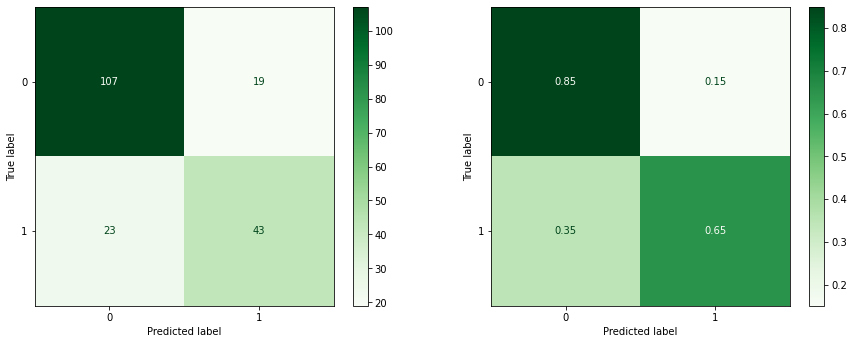

In [25]:
%matplotlib inline
plt.figure(figsize = (15,5.5))
fig = plt.subplot(1,2,1)
plot_confusion_matrix(SVM_model, X_testpca, y_test, values_format = '.0f', cmap = 'Greens', ax = fig);
fig = plt.subplot(1,2,2)
plot_confusion_matrix(SVM_model, X_testpca, y_test, normalize = 'true', cmap = 'Greens', ax = fig);

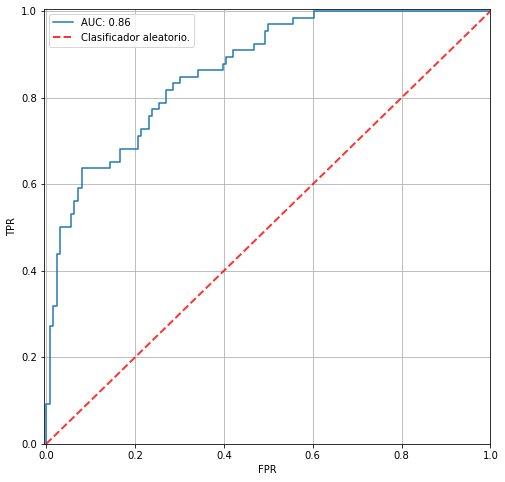

In [26]:
plt.figure(figsize = (8,8))
y_pre_proba = SVM_model.predict_proba(X_testpca)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pre_proba)
auc = roc_auc_score(y_test, y_pre_proba)
plt.plot(fpr,tpr, label = 'AUC: {:.2f}'.format(auc));
plt.plot([0,1],[0,1], linestyle = '--', lw = 2, color = 'r', alpha = 0.8, label = 'Clasificador aleatorio.');
plt.grid();
plt.legend();
plt.xlim([-0.005,1]);
plt.ylim([0,1.005]);
plt.xlabel('FPR');
plt.ylabel('TPR');

**Nueva gráfica de áreas.**

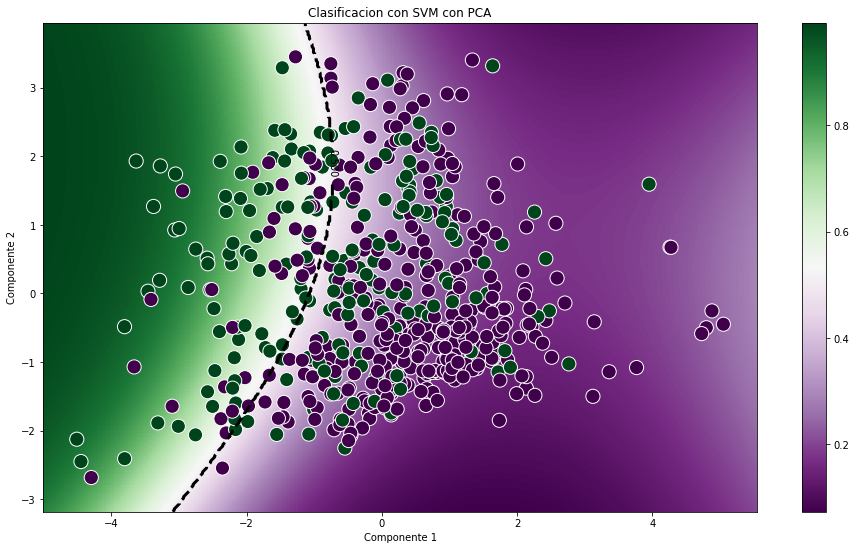

In [29]:
pca = PCA(n_components = 2)
X = pca.fit_transform(X_train)
y = y_train

h = 0.02
clf = SVC(kernel = 'rbf', probability = True, C = 10, gamma = 0.01 )
clf.fit(X, y) #Solo las dos componentes
x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
zz = Z.reshape(xx.shape)
plt.figure(figsize = (16,9))
plt.pcolormesh(xx, yy, zz, cmap = 'PRGn')
plt.colorbar()
contours = plt.contour(xx, yy, zz, colors = 'k', levels = [0.5], linewidths = 3, linestyles = 'dashed')
plt.clabel(contours, inline = True, fontsize = 10)

plt.scatter(X[:,0], X[:,1], c = y, cmap = 'PRGn', edgecolors = 'w', s = 200)
plt.xlim([x_min, x_max]);
plt.ylim([y_min, y_max]);
plt.title('Clasificacion con SVM con PCA');
plt.xlabel('Componente 1');
plt.ylabel('Componente 2');